In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

from glob import glob # toplam sınıf sayısını öğrenebilmek için

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_path = "/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/"
test_path = "/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/"

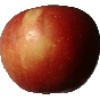

In [3]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
img

In [4]:
# input bir resimdi ve bu resimi matrise çevirmeliyim
x = img_to_array(img)
print(x.shape) # 100 satır, 100 sütun, 3 kanal sayısı (RGB)

(100, 100, 3)


In [5]:
# kaç tane sınıf var?
# train klasörünün içerisindeki bütün klasörler(*)
className = glob(train_path + "*")
className[:3]

['/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Grapefruit White',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Granadilla']

In [6]:
numberOfClass = len(className)
numberOfClass # 131 tane sınıf var.

131

In [7]:
model = Sequential()
# resim 2D yani 2 boyutlu bir array, matris
# 32 tane filtre olsun. (filtrelerden feature map elde ederiz. dolayısıyla 32 tane feature map oluşur )
# filtre boyutu 3x3 olsun
model.add(Conv2D(32,(3,3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D()) # default 2x2

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D()) # default 2x2

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D()) # default 2x2

model.add(Flatten()) # düzleştirir
model.add(Dense(1024)) # 1024 tane nöron
model.add(Activation("relu"))
model.add(Dropout(0.5)) # 1024 tanenin %50'sini kapatalım, her defasında 512 tanesi aktif olur
model.add(Dense(numberOfClass)) # output layer
# output layer'ındaki nöron sayısı, output kadar olmak zorunda
# output, sınıf sayısına eşittir.
model.add(Activation("softmax")) # ikiden fazla sınıf olduğu için

In [8]:
model.compile(loss = "categorical_crossentropy", # multiclass olduğu için
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [9]:
batch_size =32
# veri setinde birçok resim var ve bu resimlerle train/eğitim yapılır. 
# batch_size kadar belirlenen resimle eğitim yapılır
# yani her iterasyonda batch_size kadar resimle eğitim yapılır

In [10]:
a = glob(train_path + "Apple Braeburn" + "/*")
len(a) # Apple Braeburn'dan 492 tane var

492

In [11]:
# her meyveden 492 adet olsun toplam meyve sayısı nedir?
# toplam sınıf sayısı * her bir meyve adet
len(className)*len(a) # 131*492 = 64452

64452

In [12]:
# deep learning'de eğitim için 492 adet veri yeterli değildir.
# bunun için data augmentation yapmalıyız (image data generetor)
# yani resimleri çoklayacağız, daha fazla resim elde edeceğiz

In [13]:
## Data Generation 
# farklı farklı veriler üretilecek
train_datagen = ImageDataGenerator(
    rescale= 1./255, # resimleri 0 ile 1 arasındaki verilere dönüştürelim
    shear_range =0.3, # belirli bir açıyla sağa ya da sola çevriliyor
    horizontal_flip =True, # yatay bir şekilde çevir
    zoom_range=0.3 # görüntülerin yakınlaştırılması veya uzaklaştırılmasının miktarını belirtir.
)

Bu parametreler, ImageDataGenerator nesnesi tarafından kullanılarak eğitim verilerinin çeşitlendirilmesini sağlar. Bu, modelin daha iyi genelleme yapmasına ve overfitting'i önlemesine yardımcı olabilir.

In [14]:
# test veri setini normalize edelim
# rescale ile 0 ile 1 arasında verilere çevirmeliyiz, normalize etmeliyiz
# çünkü train verisi normalize edildi.
test_datagen = ImageDataGenerator(
    rescale= 1./255, # resimleri 0 ile 1 arasındaki verilere dönüştürelim
)

flow_from_directory:

Eğer train veri setinin yolu şu şekildeyse: Traning - Traning'in içerisinde sınıflar - sınıfların içerisinde bulunduğu sınıfın verileri varsa

bunu otomatik bir şekilde flow_from_directory fonksiyonu okuyabilir.

In [15]:
# train generator oluşturuluyor
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = x.shape[:2], # meyvelerin, resimlerin boyutu 100x100
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode ="categorical"
)
# otomatik bir şekilde her bir meyveyi farklı sınıflara ayıracak 
# her bir meyvenin resimlerini o sınıfların içerisine depolar

Found 67692 images belonging to 131 classes.


In [16]:
# test generator oluşturuluyor
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = x.shape[:2], # meyvelerin, resimlerin boyutu 100x100
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode ="categorical"
)
# otomatik bir şekilde her bir meyveyi farklı sınıflara ayıracak 
# her bir meyvenin resimlerini o sınıfların içerisine depolar

Found 22688 images belonging to 131 classes.


In [17]:
# model eğitilecek, train
hist = model.fit_generator(
    generator = train_generator,
    # train için buna göre resim üretir
    steps_per_epoch = 1600 // batch_size, # 1 epoch'da yapılması gereken batch sayısı
    epochs = 10, # bütün resimler ve yaratılan resimlerin hepsi, 10 kez train edilecek
    validation_data = test_generator,
    validation_steps = 800 // batch_size # test için buna göre resim üretir
)

/tmp/ipykernel_20/1754352591.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
50/50 [==============================] - 24s 462ms/step - loss: 4.6083 - accuracy: 0.0306 - val_loss: 4.0545 - val_accuracy: 0.0662
Epoch 2/10
50/50 [==============================] - 24s 477ms/step - loss: 3.8503 - accuracy: 0.0925 - val_loss: 3.3119 - val_accuracy: 0.1675
Epoch 3/10
50/50 [==============================] - 23s 450ms/step - loss: 3.2707 - accuracy: 0.1531 - val_loss: 2.7573 - val_accuracy: 0.2288
Epoch 4/10
50/50 [==============================] - 23s 460ms/step - loss: 2.7320 - accuracy: 0.2637 - val_loss: 1.9733 - val_accuracy: 0.5063
Epoch 5/10
50/50 [==============================] - 23s 450ms/step - loss: 2.2522 - accuracy: 0.3381 - val_loss: 1.6915 - val_accuracy: 0.5150
Epoch 6/10
50/50 [==============================] - 22s 437ms/step - loss: 1.8836 - accuracy: 0.4338 - val_loss: 1.5990 - val_accuracy: 0.4737
Epoch 7/10
50/50 [==============================] - 22s 437ms/step - loss: 1.6157 - accuracy: 0.5013 - val_loss: 1.2543 - val_accuracy: 0.6200

* ImageDataGenerator, farklı farklı resimleri orijinallerinden üretecek
* 1600 // batch_size = 50
* bir epoch'da yapılması gereken batch sayısı steps_per_epoch = 1600 // batch_size
* yani bir epoch boyunca 50 kez veri train edilir, eğitilir.

* 400 tane resmim var, batch_size 32
* tüm veri kaç seferde train edilir 400 // 32 = 12
* ilk 32 resim, 32, 32... 12x32=400
* 12 seferde tüm resimler train edilir

* ImageDataGenerator kaç tane resim üretir?
* steps_per_epoch = 1600 // batch_size = 50

* normal veri, 12 seferde 32'lik paketleri 1 epoch'da train edilir

* 1 epoch'da yapılması gereken batch sayısı: steps_per_epoch = 1600 // batch_size = 50
* 50*32 = 1600 tane resim lazım 400 tane var 1600-400=1200 tane 
* ImageDataGenerator 1600-400=1200 tane resim üretir

In [18]:
# modeli kaydet
model.save_weights("model.h5")

In [19]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
# elde ettiğimiz verileri görselleştireceğiz

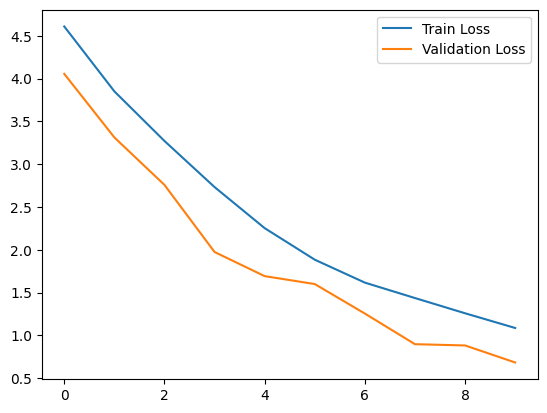

In [21]:
# Loss
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend() # label'ların görünmesi için
plt.show()

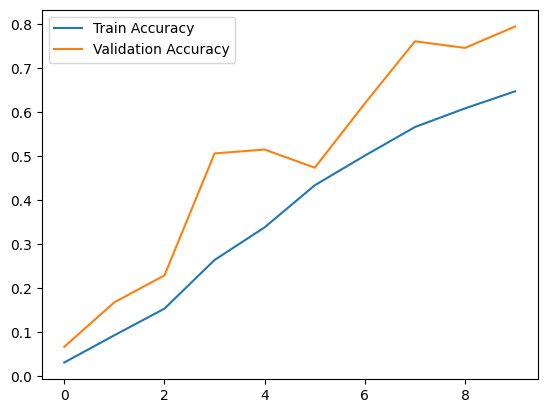

In [22]:
# Accuracy
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend() # label'ların görünmesi için
plt.show()

In [23]:
# history kaydet
import json 
with open("hist.json", "w") as f:
    json.dump(hist.history, f)

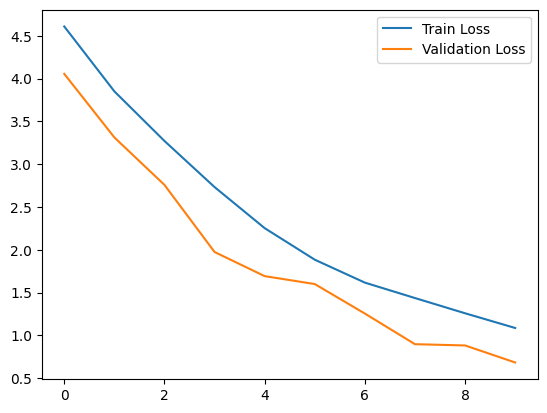

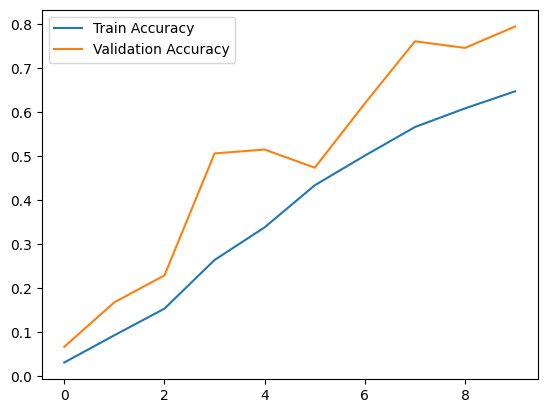

In [24]:
# history yükle
import codecs
with codecs.open("hist.json","r", encoding ="utf-8") as f:
    h = json.loads(f.read())

# görselleştir
# Loss
plt.figure()
plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend() # label'ların görünmesi için
plt.show()

# Accuracy
plt.figure()
plt.plot(h["accuracy"], label = "Train Accuracy")
plt.plot(h["val_accuracy"], label = "Validation Accuracy")
plt.legend() # label'ların görünmesi için
plt.show()

* epoch sayısı arttıkça yani train sayısı arttıkça loss giderek azalır.
* epoch sayısı arttıkça yani train sayısı arttıkça accuracy artar. 